<h1><center>Santander Customer Satisfaction:</center></h1>

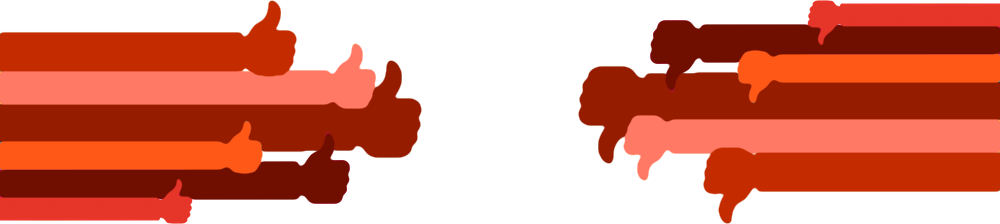

# Introduction:

Santander Bank is a retail banking company, meant for providing banking services to the general public. Customer satisfaction is of utmost priority for any business and it is very important for a bank to identify all the unsatisfied customers so that management can take care of their needs and prevent them from leaving the bank. But the problem lies in identification of these unsatisfied customers because the unsatisfied customers don’t express their reason of dissatisfaction with the bank directly. In addition to that it is just not possible for banking management to identify unsatisfied customers by just looking at their banking records because it is very difficult for a human being to identify a pattern from so many variables present in the customer’s banking record. Also doing that is not possible for each customer as the number of customers is very high.

So for the given problem employing a machine learning model is the only solution by which unsatisfied customers can be identified in very less time.  Using Machine Learning, a model can be created that can identify unsatisfied customers. After which the bank can directly approach those customers and resolve their issue or take appropriate action like offering them exclusive offers to prevent the customer from leaving the bank.


# Data Analysis:

All relevant data can be obtained from the following link:

https://www.kaggle.com/c/santander-customer-satisfaction/data

*Brief Description of dataset:*

For the dataset we are given, each row represents a customer. We are given two datasets ‘train.csv’ and ‘test.csv’ with 371 and 370 features respectively. Since it is a competition only train dataset has an extra column called ’TARGET’ which isn’t present in test dataset. ‘TARGET’ column show’s customer’s satisfaction. Value ‘0’ in TARGET column means the customer is satisfied, value ‘1’ means customer is unsatisfied. Column names don’t really convey a meaning about what they represent, maybe the column names are renamed on purpose for security/privacy reasons.
Data is highly unbalanced with only 3.957% belonging to class ‘1’ that is unsatisfied customers.

Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df= pd.read_csv("train.csv")
test_df= pd.read_csv("test.csv")

In [ ]:
train_df

ID  var3  var15  ...  saldo_medio_var44_ult3          var38  TARGET
0           1     2     23  ...                     0.0   39205.170000       0
1           3     2     34  ...                     0.0   49278.030000       0
2           4     2     23  ...                     0.0   67333.770000       0
3           8     2     37  ...                     0.0   64007.970000       0
4          10     2     39  ...                     0.0  117310.979016       0
...       ...   ...    ...  ...                     ...            ...     ...
76015  151829     2     48  ...                     0.0   60926.490000       0
76016  151830     2     39  ...                     0.0  118634.520000       0
76017  151835     2     23  ...                     0.0   74028.150000       0
76018  151836     2     25  ...                     0.0   84278.160000       0
76019  151838     2     46  ...                     0.0  117310.979016       0

[76020 rows x 371 columns]

In [ ]:
test_df

ID  var3  ...  saldo_medio_var44_ult3          var38
0           2     2  ...                     0.0   40532.100000
1           5     2  ...                     0.0   45486.720000
2           6     2  ...                     0.0   46993.950000
3           7     2  ...                     0.0  187898.610000
4           9     2  ...                     0.0   73649.730000
...       ...   ...  ...                     ...            ...
75813  151831     2  ...                     0.0   40243.200000
75814  151832     2  ...                     0.0  146961.300000
75815  151833     2  ...                     0.0  167299.770000
75816  151834     2  ...                     0.0  117310.979016
75817  151837     2  ...                     0.0  117310.979016

[75818 rows x 370 columns]

In [ ]:
train_id= train_df['ID']
test_id= test_df['ID']

train_df.drop(['ID'], axis=1, inplace= True)
test_df.drop(['ID'], axis=1, inplace= True)

In [ ]:
y_train= train_df['TARGET']
train_df= train_df.drop('TARGET', axis=1)

# Exploratory data analysis (EDA)

## Checking class imbalance if any:


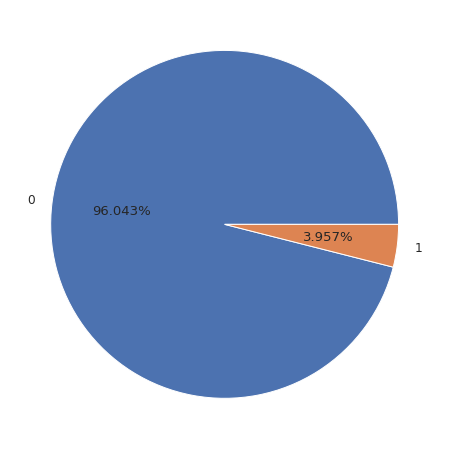

Number of Positive data points are: 3008  (3.957%)
Number of Negative data points are: 73012 (96.043%)


In [ ]:
zero= train_df['TARGET'].value_counts()[0]
one= train_df['TARGET'].value_counts()[1]
my_labels=[0,1]
plt.rcParams["figure.figsize"] = (8,8)

plt.pie([zero,one], labels= my_labels, autopct='%1.3f%%')
plt.show()

print("Number of Positive data points are: {}  ({:.3f}{})".format(one, one/(one+zero)*100, "%"))
print("Number of Negative data points are: {} ({:.3f}{})".format(zero, zero/(one+zero)*100, "%"))

As we can see from the pie chart above that this is very highly imbalanced dataset. We can see in above plot that there are 3.95% TARGET label which are '0' i.e those customers who are unsatisfied from the bank. To compensate this data imbalance we can use SMOTE to oversample and balance this dataset.

## Checking for null values and infinity values:

In [ ]:
print("Number of Null values {}".format(train_df.isnull().sum().sum()))
print("Number of Infinite values {}".format(train_df.isin([np.inf, -np.inf]).sum().sum()))

Number of Null values 0
Number of Infinite values 0


Great! There are No null or infinite values in our dataset.

Now lets look at Constant, Quassi constant and Sparse features:

## Presence of constant features:

In [ ]:
from sklearn.feature_selection import VarianceThreshold

vt= VarianceThreshold(threshold= 0) #threshold: features with set-variance 0 is removed
vt.fit(train_df)
const_feat= [x for x in train_df.columns if (x !='TAREGT') and (x not in train_df.columns[vt.get_support()])]
print("There are {} constant features".format(len(const_feat)))

There are 34 constant features


## Presence Quassi constant features:

In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt= VarianceThreshold(threshold= 0.02) #threshold: features with set-variance less than this value is removed
vt.fit(train_df)

quasi_const_feat= [x for x in train_df.columns if ((x!='TARGET') and (x not in train_df.columns[vt.get_support()]))]

print("There are {} quassi-constant features".format(len(quasi_const_feat)))

There are 106 quassi-constant features


## Identifying Sparse features:

In [ ]:
zeros= (train_df == 0).astype(int).sum()
not_zeros= (train_df != 0).astype(int).sum()

sparse_columns=[]

for i in range(len(train_df.columns)):
  if (zeros[i]/(zeros[i]+not_zeros[i])) > 0.998:
    sparse_columns.append(train_df.columns[i])
print("There are {} sparse features".format(len(sparse_columns)))

There are 177 sparse features


## Correlations of features with heatmap:

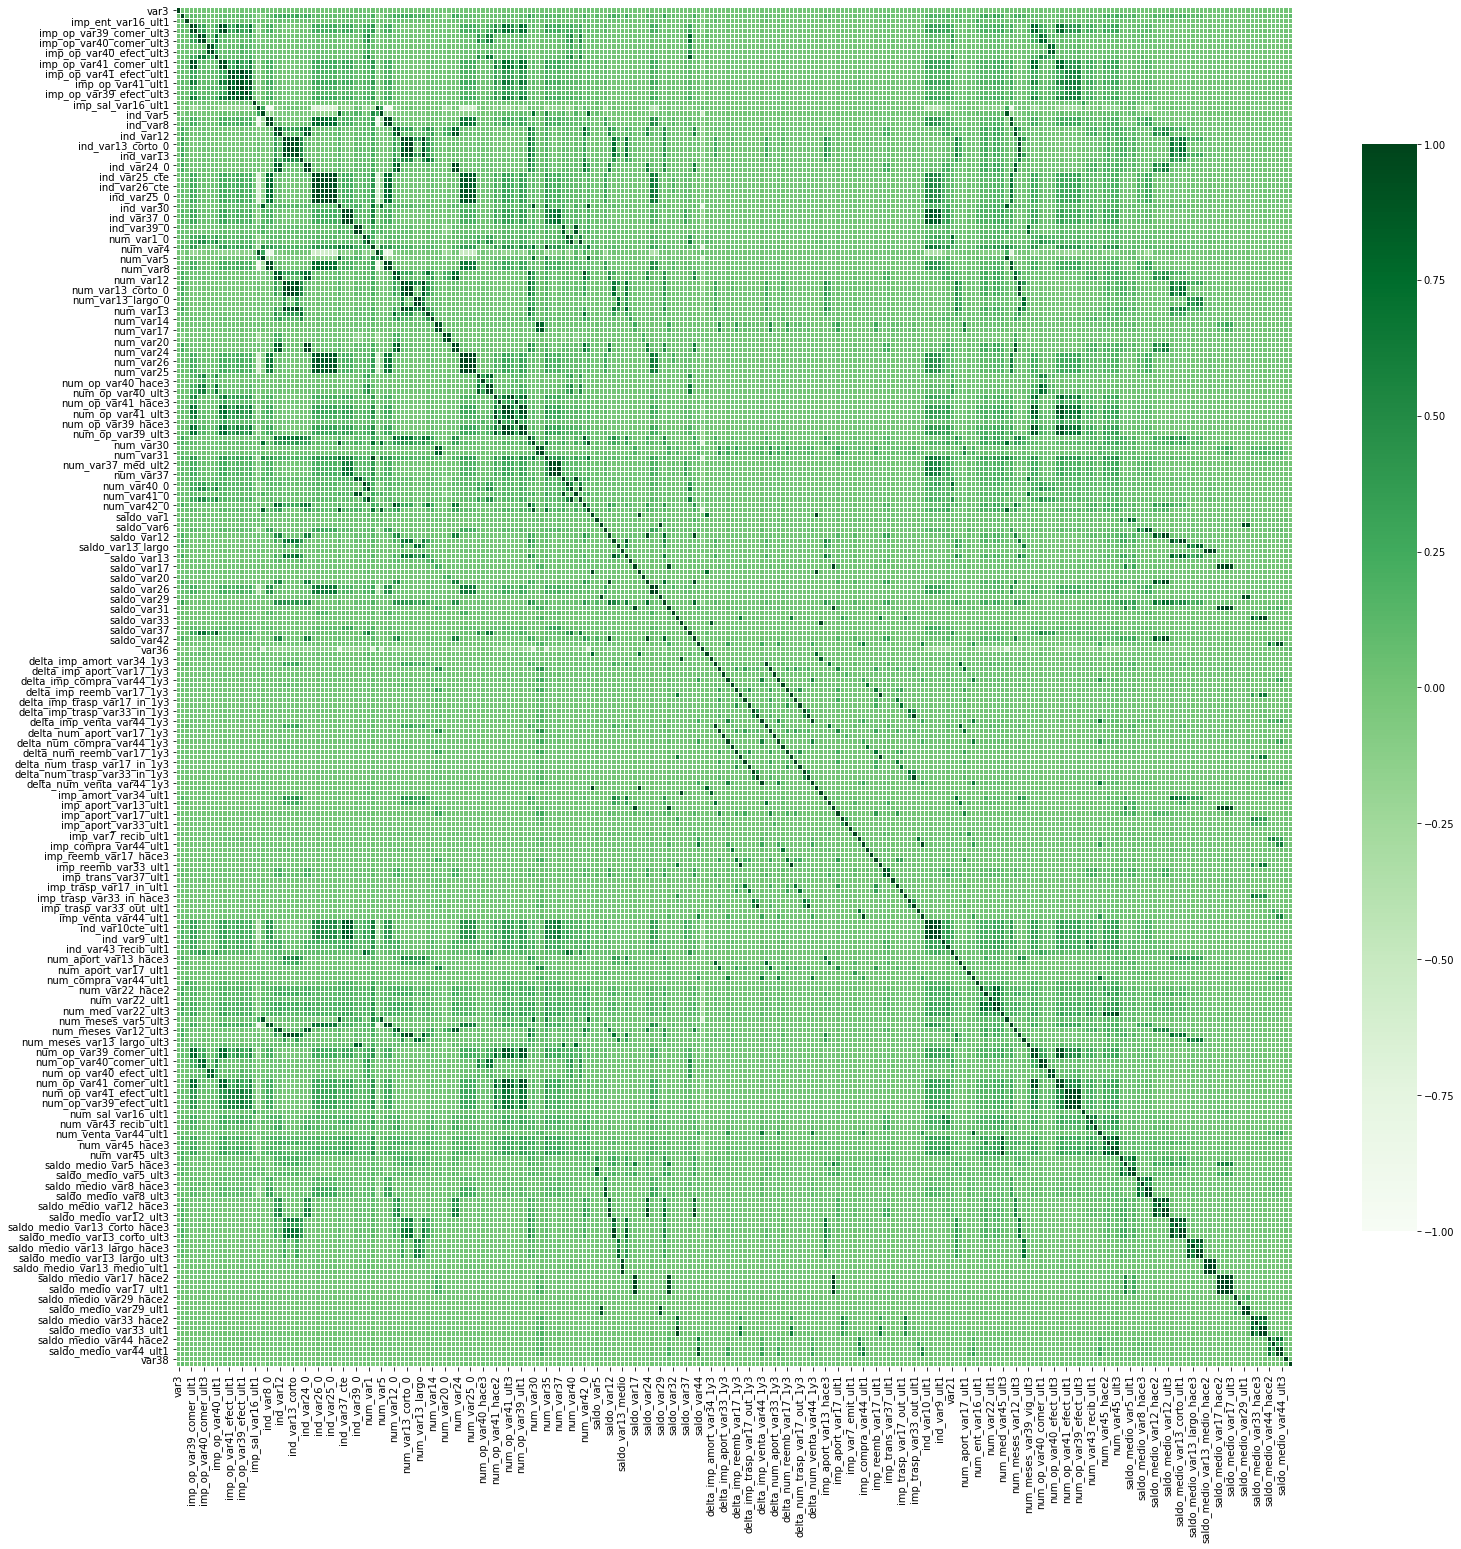

In [ ]:
fig, ax_1 = plt.subplots(figsize=(25, 25))


# plot heatmap
sns.heatmap(train_df.corr(), vmin= -1, vmax=1.00,
           linewidth=0.01,cmap="Greens", cbar_kws={"shrink": .8}, ax=ax_1)

plt.show()

Above heatmap shows that there are features which are correlated. Correlated features are similar and don't really help in classification. That means we later on while data preprocessing we need to remove these correlated features.

Based on various thresholds selected above, our dataset has:

* 34 Constant features
* 106 quassi constant features
* 117 sparse features
* Lots of correlated features

Later on we will remove the above features as they are less likely to contribute in classification process

Lets look at the description of dataset:

In [ ]:
train_df.describe()

var3         var15  ...         var38        TARGET
count   76020.000000  76020.000000  ...  7.602000e+04  76020.000000
mean    -1523.199277     33.212865  ...  1.172358e+05      0.039569
std     39033.462364     12.956486  ...  1.826646e+05      0.194945
min   -999999.000000      5.000000  ...  5.163750e+03      0.000000
25%         2.000000     23.000000  ...  6.787061e+04      0.000000
50%         2.000000     28.000000  ...  1.064092e+05      0.000000
75%         2.000000     40.000000  ...  1.187563e+05      0.000000
max       238.000000    105.000000  ...  2.203474e+07      1.000000

[8 rows x 370 columns]

## Correlation between continuos and categorical features

In [ ]:
from scipy import stats

F,p= stats.f_oneway(train_df[train_df.TARGET==1].var15,
                    train_df[train_df.TARGET==0].var15)

F,p

(788.5084933218477, 1.3022841332153018e-172)

## Univariate Analysis:

### Analysing feature 'var15'

We can see in the description of dataset above particularly at column 'var15' which has minimum value 5 and maximum value 105. We should take a close look at this feature which according to some literature surveys can be age, and also considered an important feature, so if we can find any pattern in distribution of this feature then later we can use this feature in feature engineering.

In [ ]:
np.sort(pd.unique(train_df['var15']))

array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 104, 105])

All the unique values range from 5 to 105, it looks like this features 'var15' could really be age of the customers. So let's plot some graph and check their distribution over the data.

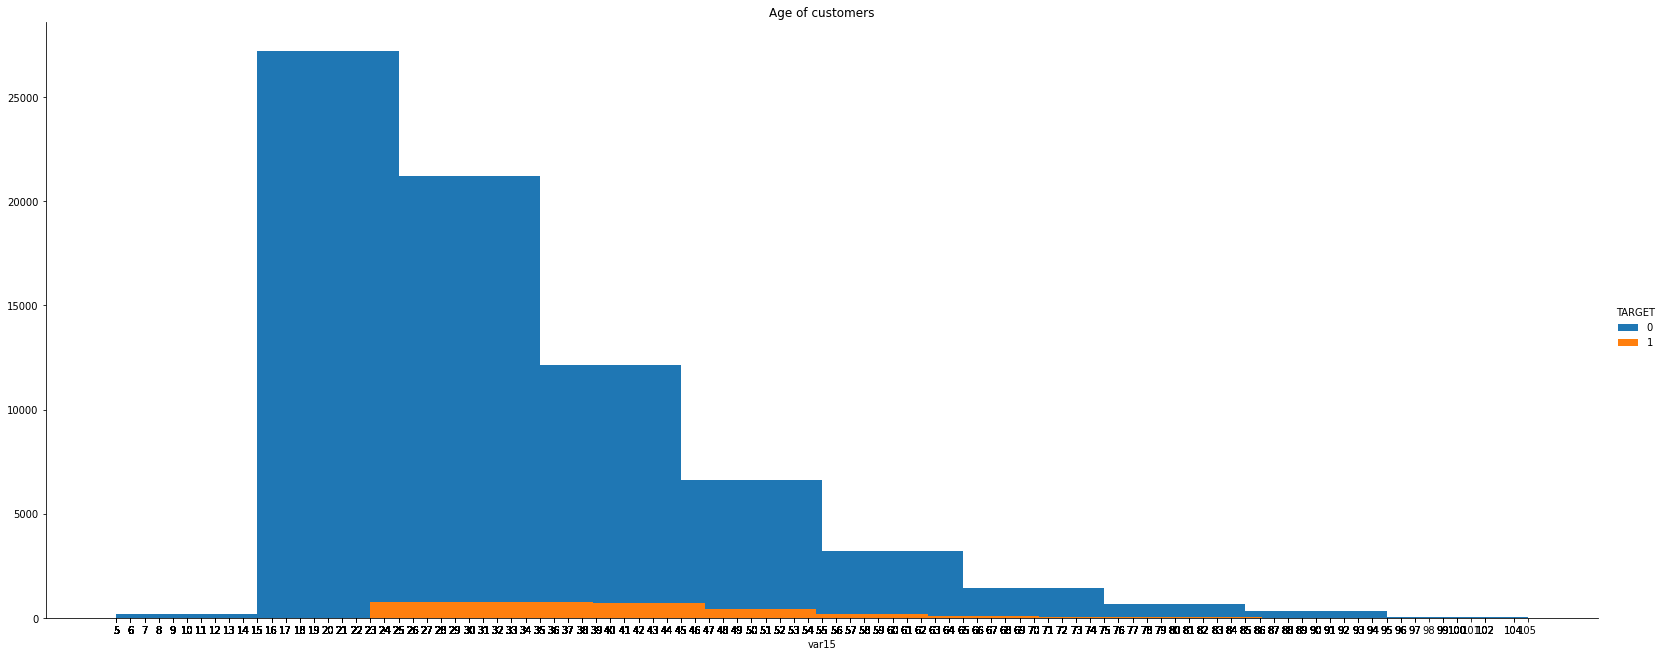

In [ ]:
import seaborn as sns
counts, bins = np.histogram(train_df)

g= sns.FacetGrid(train_df, hue="TARGET", height=9, aspect=2.5).map(plt.hist, "var15").add_legend()
g.set(xticks=train_df.var15)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.title('Age of customers')
plt.show()

From above plot we can see that majority of customers are young and most of them are under the age of 30. And we can also see from the above graph that customers below age '23' are never unsatisfied.

So we can create a new feature which willbe categorical denoting whether age is less than 23 or not.

Further we can see that there are no unsatisfied customer at age above 80, lets check this through a code.

In [ ]:
for age in [79,80]:
  cnt= 0
  for i in train_df['var15']:
    if (i > age) and (train_df['TARGET'][i]==1):
      cnt +=1
  print("Number of unsatisfied customers of more than {} age: {}".format(age, cnt))

Number of unsatisfied customers of more than 79 age: 57
Number of unsatisfied customers of more than 80 age: 0


As we can see that there aren't any unsatisfied customers above age 80. This too can be made into a categorical feature whether customer's age is above 80 or not.

### Analysing 'num_var4'

'num_var4' feature according to some literature is believed to be number of banking products customer is having with the bank.

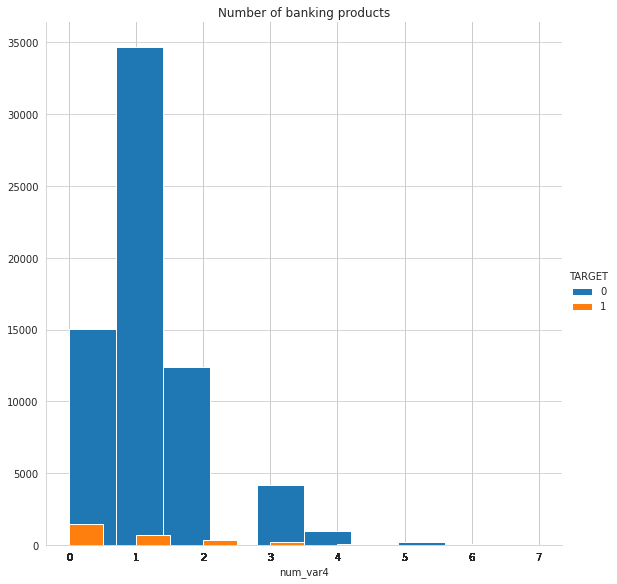

In [ ]:
import seaborn as sns

g= sns.FacetGrid(train_df, hue="TARGET", height=8, aspect=1).map(plt.hist, "num_var4").add_legend()
g.set(xticks=train_df.num_var4)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.title('Number of banking products')
plt.show()

From the above plot we can see that majority of Unsatisfied Customers don't tend to buy any banking products. Maybe this is because of the fact that they are unsatisfied and aren't interested in continuing with the bank.

On the other hand very few people tend to have more than 2 banking products. This plot gives an overview, lets get the actual data for further analysis.

In [ ]:
train_df['num_var4'].value_counts()

1    35348
0    16536
2    12692
3     4377
4     1031
5      203
6       36
7        6
Name: num_var4, dtype: int64

In [ ]:
train_df.loc[train_df['TARGET']==1]['num_var4'].value_counts()

0    1482
1     692
2     333
3     182
4      58
5       6
Name: num_var4, dtype: int64

Number of banking products 6 and 7 didn't make it in the series above. So it is clear that customers who have 6 or more than 6 banking products with the bank are all satisfied. This could be used to make a new feature while feature engineering whether value of 'num_var4' is 6 or more than 6.

## Feature importance:

From literature surveys we know what some of the features mean, besides that it is difficult to find meaning of features, so for further features analysis we will find feature importance and use the top feature for analysis purpose.

Text(0.5, 0, 'Random Forest Feature Importance')

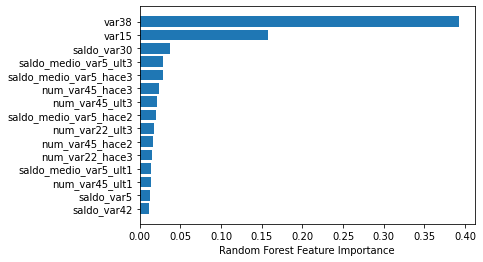

In [ ]:
# decissiontree for feature importance:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(train_df, y_train)

# get importance
importance_dt = model.feature_importances_

# before feat engg
sorted_idx = importance_dt.argsort()[-15:]
plt.barh(train_df.columns[sorted_idx], importance_dt[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'XGBClassifier Feature Importance')

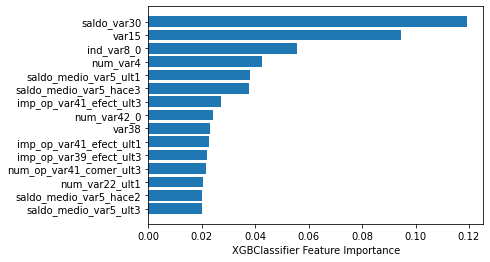

In [ ]:
# xgbclassifier for feature importance:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(train_df, y_train)

# get importance
importance_xgb = model.feature_importances_

# before feat engg
sorted_idx = importance_xgb.argsort()[-15:]
plt.barh(train_df.columns[sorted_idx], importance_xgb[sorted_idx])
plt.xlabel("XGBClassifier Feature Importance")

## Bivariate analysis:

### Bivariate Analysis with top 5 features obtained from decissiontreeclassifier and xgbclassifier:

Bivariate analysis of top 5 features obtained from DecissionTreeClassifier:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<Figure size 7200x7200 with 0 Axes>

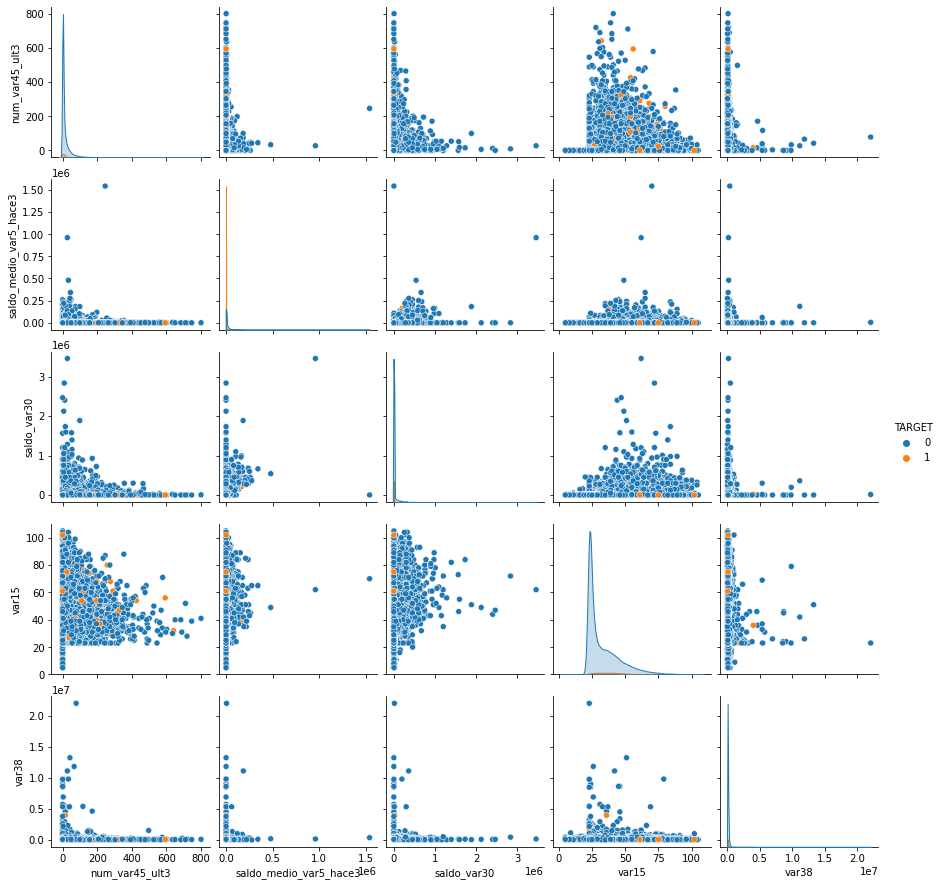

In [ ]:
sorted_idx = importance_dt.argsort()[-5:]
top_feat= list(train_df.columns[sorted_idx])

train_df_2= train_df[top_feat]
train_df_2['TARGET']= y_train

plt.figure(figsize=(100, 100))
sns.pairplot(train_df_2, diag_kind='kde',hue='TARGET');

From the above plots we can see that there aren't any features which can efficiently seperate two classes, however some pattern is vissible in some of the plots like in plot 'saldo_var30 vs var15' we can see that TARGET with value 1 tend to be vissible at very low values of saldo_var30.

Similarly in plot 'saldo_medio_var5_hace3' vs 'var15' we can see that positive datapoints tend to have lower values.

Based on the above three features (saldo_var_30, var15, var38) we can further perfom multivariate analysis to see relations between them simultaneously.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 7200x7200 with 0 Axes>

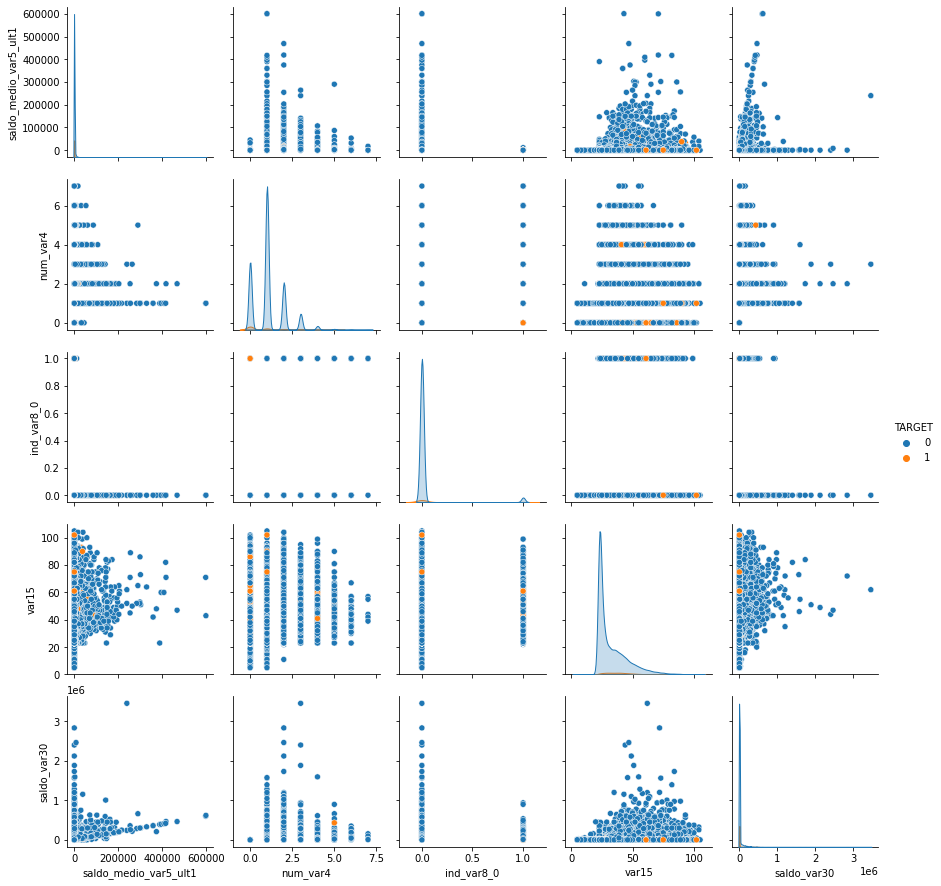

In [ ]:
sorted_idx = importance_xgb.argsort()[-5:]
top_feat= list(train_df.columns[sorted_idx])

train_df_2= train_df[top_feat]
train_df_2['TARGET']= y_train

plt.figure(figsize=(100, 100))
sns.pairplot(train_df_2, diag_kind='kde',hue='TARGET');

We can't see anything valuable from the above plots except for saldo_var30 and var15 which we have discussed earlier. So lets do multivariate analysis for further analysis.

## Multivariate analysis:

Since there are lots of features, we will be doing analysis of those features which are considered important in feature importance earlier.

### saldo_medio_var5_ult3, saldo_var30, num_var45_hace3

Lets plot a 3d scatter plot between the top three features (var15, saldo_var30, var38) obtained earlier and see if we can find a pattern which might help in classification porcess.

In [ ]:
sorted_idx = importance_dt.argsort()[-10:]
top_feat= list(train_df.columns[sorted_idx])

train_df_1= train_df[top_feat]
train_df_1['TARGET']= y_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
import plotly.express as px

fig = px.scatter_3d(train_df_1, x='saldo_medio_var5_ult3', y='saldo_var30', z='num_var45_hace3',
              color='TARGET')
fig.show()

As we can see from the 3-D scatter plot, a large number of datapoints with class label '1' seems to be cornered in single place i.e majority of occurance of class variable 'TARGET'=1 happens where the values of saldo_var_30 and saldo_medio_var5_ult3 is very low.

Lets check at what values of saldo_var_30 we can mostly observe the values of TARGET=1

In [ ]:
# saldo_var30
value=[]
count=[]

for i in (train_df_1.saldo_var30.unique()):
  count.append(train_df_1[(train_df_1.saldo_var30==i) & (train_df_1.TARGET==1)].count()[0])
  value.append(i)

sorted_index= np.argsort(np.array(count))[-5:]

for i in sorted_index:
  print("for value {}, there are {} datapoints with TARGET values =1".format(value[i], count[i]))

for value 30.0, there are 39 datapoints with TARGET values =1
for value 90.0, there are 39 datapoints with TARGET values =1
for value 15.0, there are 39 datapoints with TARGET values =1
for value 3.0, there are 320 datapoints with TARGET values =1
for value 0.0, there are 1786 datapoints with TARGET values =1


As we can see from the above code that more than 50% of unsatisfied customers have the value of variable 'saldo_var30' =0. We can make a new feature out of this based on value of saldo_var30 whether it is equal to any of the values 0 or 3.

In the following code, lets check at what values of saldo_medio_var5_ult3 we can mostly observe the values of TARGET=1:

In [ ]:
#saldo_medio_var5_ult3
value=[]
count=[]

for i in (train_df_1.saldo_medio_var5_ult3.unique()):
  count.append(train_df_1[(train_df_1.saldo_medio_var5_ult3==i) & (train_df_1.TARGET==1)].count()[0])
  value.append(i)

sorted_index= np.argsort(np.array(count))[-5:]

for i in sorted_index:
  print("for value {}, there are {} datapoints with TARGET values =1".format(value[i], count[i]))

for value 2.88, there are 18 datapoints with TARGET values =1
for value 2.28, there are 18 datapoints with TARGET values =1
for value 2.04, there are 19 datapoints with TARGET values =1
for value 2.34, there are 22 datapoints with TARGET values =1
for value 0.0, there are 1929 datapoints with TARGET values =1


As we can see from the above code that about 65% of unsatisfied customers have the value of variable 'saldo_medio_var5_ult3'= 0.0. We can make a new feature out of this based on value of saldo_medio_var5_ult3 whether it is equal to 0 or not.

### var15, saldo_medio_var5_hace3, var38

In [ ]:
import plotly.express as px

fig = px.scatter_3d(train_df_1, x='var15', y='saldo_medio_var5_hace3', z='var38',
              color='TARGET')
fig.show()

In [ ]:
value=[]
count=[]

for i in (train_df_1.var38.unique()):
  count.append(train_df_1[(train_df_1.var38==i) & (train_df_1.TARGET==1)].count()[0])
  value.append(i)

sorted_index= np.argsort(np.array(count))[-5:]

for i in sorted_index:
  print("for value {}, there are {} datapoints with TARGET values =1".format(value[i], count[i]))

for value 51769.17, there are 2 datapoints with TARGET values =1
for value 60170.88, there are 2 datapoints with TARGET values =1
for value 118720.26, there are 2 datapoints with TARGET values =1
for value 105318.6, there are 2 datapoints with TARGET values =1
for value 117310.979016494, there are 614 datapoints with TARGET values =1


As we can see that a large number of datapoints which have value of 'TARGET'=1, tend to have 'var38' value equal to 117310.979016494. While feature engineering we will make a new feature based on this.

# Feature preprocessing

Most of the feature processing will be done based on EDA done earlier such as constant, quassi constant, sparse features removal.

## Removing constant features (features with no variance):

Features with no variance don't contribute at all in classification process. So in next cell we will identify such features and remove them.

In [ ]:
def remove_const_feature(train= train_df, test=test_df, threshold=0):
  from sklearn.feature_selection import VarianceThreshold

  vt= VarianceThreshold(threshold= threshold) #threshold: features with set-variance 0 is removed
  vt.fit(train_df)
  const_feat= [x for x in train_df.columns if (x !='TAREGT') and (x not in train.columns[vt.get_support()])]

  print("Number of columns before: {} ".format(train_df.shape[1]))
  train_df.drop(const_feat, axis=1, inplace=True)
  test_df.drop(const_feat, axis=1, inplace=True)

  print("{} features with 0 variance have been removed".format(len(const_feat)))
  print("Number of columns in train dataset after: {} ".format(train_df.shape[1]))
  print("Number of columns in test dataset after: {} ".format(test_df.shape[1]))
  print("----------------------------------------")

In [ ]:
remove_const_feature(train_df,test_df)

Number of columns before: 369 
34 features with 0 variance have been removed
Number of columns in train dataset after: 335 
Number of columns in test dataset after: 335 
----------------------------------------


## Removing Quassi constant features (features with very little variance):

Just like features with 0 variance, we can also eliminate features with very little variance also known as quassi constant features..

In [ ]:
def remove_quassi_const_feat(train= train_df, test= test_df, threshold=0.0005):
  from sklearn.feature_selection import VarianceThreshold

  vt= VarianceThreshold(threshold= threshold) #threshold: features with set-variance less than this value is removed
  vt.fit(train_df)

  quasi_const_feat= [x for x in train_df.columns if ((x!='TARGET') and (x not in train_df.columns[vt.get_support()]))]

  print("Number of columns before: {} ".format(train_df.shape[1]))

  train_df.drop(quasi_const_feat, axis=1, inplace= True)
  test_df.drop(quasi_const_feat, axis=1, inplace= True)

  print("{} features with very little variance have been removed".format(len(quasi_const_feat)))
  print("Number of columns in train dataset after: {} ".format(train_df.shape[1]))
  print("Number of columns in test dataset after: {} ".format(test_df.shape[1]))
  print("----------------------------------------")

In [ ]:
remove_quassi_const_feat(train_df)

Number of columns before: 369 
97 features with very little variance have been removed
Number of columns in train dataset after: 272 
Number of columns in test dataset after: 272 
----------------------------------------


From the heatmap of features in EDA it is clear that there are lots of features which are correlated to each other. Lets remove the features which are highly correlated to each other. Lets take the threshold to be 0.97. If two features have correlation greater than 0.97, then second feature will be dropped and first one will be kept.

## Removing features which are highly correlated to each other:

In [ ]:
def del_correlated_feats(train= train_df, test=test_df, threshold=0.98):

  correlated_columns=  []
  correlations= train_df.corr() #computes pairwise correlation of columns

  for i in range(len(train_df.columns)):
    for j in range(i):
      if (correlations.iloc[i,j] >= threshold) and (correlations.columns[j] not in correlated_columns): #if correlation greater than threshold
        correlated_columns.append(correlations.columns[i]) #add that column name to list

  print("Number of columns before: {} ".format(train_df.shape[1]))
  print("Number of columns before: {} ".format(test_df.shape[1]))

  print("Number of correlated features being removed: {}".format(len(correlated_columns)))

  train_df.drop(set(correlated_columns), axis=1, inplace= True)
  test_df.drop(set(correlated_columns), axis=1, inplace= True)

  print("Number of columns in train dataset after: {} ".format(train_df.shape[1]))
  print("Number of columns in test dataset after: {} ".format(test_df.shape[1]))
  print("----------------------------------------")

In [ ]:
del_correlated_feats(train_df, test_df)

Number of columns before: 272 
Number of columns before: 272 
Number of correlated features being removed: 78
Number of columns in train dataset after: 194 
Number of columns in test dataset after: 194 
----------------------------------------


## Removing Sparse features:

In [ ]:
def remove_sparse_feats(train= train_df, test= test_df, threshold= 0.998):
  zeros= (train_df == 0).astype(int).sum()
  not_zeros= (train_df != 0).astype(int).sum()

  sparse_columns=[]

  for i in range(len(train_df.columns)):
    if (zeros[i]/(zeros[i]+not_zeros[i])) > threshold:
      sparse_columns.append(train_df.columns[i])

  print("number of columns before: {}".format(train_df.shape[1]))
  print("number of columns before: {}".format(test_df.shape[1]))

  train_df.drop(sparse_columns, axis=1, inplace= True)
  test_df.drop(sparse_columns, axis=1, inplace= True)

  print("number of columns in train dataset after: {}".format(train_df.shape[1]))
  print("number of columns in test dataset after: {}".format(test_df.shape[1]))
  print("----------------------------------------")

In [ ]:
remove_sparse_feats(train_df, test_df)

number of columns before: 194
number of columns before: 194
number of columns in train dataset after: 130
number of columns in test dataset after: 130
----------------------------------------


# Feature Engineering

Just a general look at the data made me realise that there are lots and lots of zeros. Maybe the count of zeros and non zeros add value to our classification process while modeling. So let's just create two new feature that will give count of number of zeros and non zeros.

## Count of number of zeros and count of non_zeros:



In [ ]:
def count_of_zeros(train= train_df, test= test_df):
  for df in [train, test]:
    df.insert((df.shape[1]), 'count_zeros', (df == 0).astype(int).sum(axis=1))
    print("new feature:'count_zeros' added to dataframe")
    print("----------------------------------------")

def count_of_non_zeros(train= train_df, test= test_df):
  for df in [train, test]:
    df.insert((df.shape[1]), 'count_non_zeros', (df != 0).astype(int).sum(axis=1))
    print("new feature:'count_non_zeros' added to dataframe")
    print("----------------------------------------")

In [ ]:
count_of_zeros(train_df, test_df)
count_of_non_zeros(train_df, test_df)

new feature:'count_zeros' added to dataframe
----------------------------------------
new feature:'count_zeros' added to dataframe
----------------------------------------
new feature:'count_non_zeros' added to dataframe
----------------------------------------
new feature:'count_non_zeros' added to dataframe
----------------------------------------


## New feature: Age below 23 or not:

In [ ]:
def age_below_23(train= train_df, test= test_df):
  for df in [train, test]:
    below_23= []
    for i in (df['var15']):
      if i < 23:
        below_23.append(1)
      else:
        below_23.append(0)

    df['below_23']= below_23
    print ("added new feature whether age is below 23 or not")
    print("----------------------------------------")

In [ ]:
age_below_23(train_df,test_df)

added new feature whether age is below 23 or not
----------------------------------------
added new feature whether age is below 23 or not
----------------------------------------


## New feature: Age above 80 or not:

In [ ]:
def age_above_80(train= train_df, test= test_df):
  for df in [train, test]:
    above_80= []
    for i in (df['var15']):
      if i > 80:
        above_80.append(1)
      else:
        above_80.append(0)

    df['above_80']= above_80
    print ("added new feature whether age is above 80 or not")
    print("----------------------------------------")

In [ ]:
age_above_80(train_df,test_df)

added new feature whether age is above 80 or not
----------------------------------------
added new feature whether age is above 80 or not
----------------------------------------


## New feature: value of 'saldo_var30' equal to 0 or 3 or not:

In [ ]:
def saldo_var30_0_3(train= train_df, test= test_df):
  for df in [train, test]:
    saldo_var30_0_3= []
    for i in (df['saldo_var30']):
      if ((i == 0)or(i ==3)):
        saldo_var30_0_3.append(1)
      else:
        saldo_var30_0_3.append(0)

    df['saldo_var30_0_3']= saldo_var30_0_3
    print ("added new feature whether value of saldo_var30 is equal to 0/3 or not")
    print("----------------------------------------")

In [ ]:
saldo_var30_0_3(train_df,test_df)

added new feature whether value of saldo_var30 is equal to 0/3 or not
----------------------------------------
added new feature whether value of saldo_var30 is equal to 0/3 or not
----------------------------------------


## New feature: value of 'var38' equal to 117310.979016494 or not:

In [ ]:
def value_var38(train= train_df, test= test_df):
  for df in [train, test]:
    value_var38= []
    for i in (df['var38']):
      if (i == 117310.979016494):
        value_var38.append(1)
      else:
        value_var38.append(0)

    df['value_var38']= value_var38
    print ("added new feature whether value of var38 is equal to 117310.979016494 or not")
    print("----------------------------------------")

In [ ]:
value_var38(train_df,test_df)

added new feature whether value of var38 is equal to 117310.979016494 or not
----------------------------------------
added new feature whether value of var38 is equal to 117310.979016494 or not
----------------------------------------


## New feature: value of 'saldo_medio_var5_ult3' equal to 0.0 or not:

In [ ]:
def value_saldo_medio_var5_ult3(train= train_df, test= test_df):
  for df in [train, test]:
    value_saldo_medio_var5_ult3= []
    for i in (df['saldo_medio_var5_ult3']):
      if (i == 0.0):
        value_saldo_medio_var5_ult3.append(1)
      else:
        value_saldo_medio_var5_ult3.append(0)

    df['value_saldo_medio_var5_ult3']= value_saldo_medio_var5_ult3
    print ("added new feature whether value of saldo_medio_var5_ult3 is equal to 0 or not")
    print("----------------------------------------")

In [ ]:
value_saldo_medio_var5_ult3(train_df,test_df)

added new feature whether value of saldo_medio_var5_ult3 is equal to 0 or not
----------------------------------------
added new feature whether value of saldo_medio_var5_ult3 is equal to 0 or not
----------------------------------------


In [ ]:
print (train_df.shape)
print (y_train.shape)
print (test_df.shape)

(76020, 152)
(76020,)
(75818, 152)


## Feature importances

Now that the feature processing and feature engineering is done, lets do a quick feature importance using xgbclassifier and Decission tree to see which of the new features we included in feature engineering are important. 

Text(0.5, 0, 'Random Forest Feature Importance')

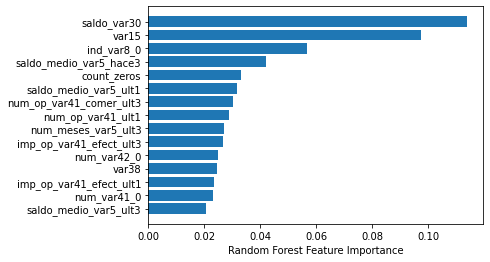

In [ ]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
from tqdm import tqdm 
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(train_df, y_train)

# get importance
feat_importance = model.feature_importances_

sorted_idx = feat_importance.argsort()[-15:]
plt.barh(train_df.columns[sorted_idx], feat_importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

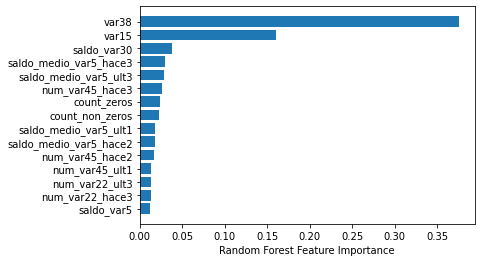

In [ ]:
# decissiontree for feature importance:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(train_df, y_train)

# get importance
importance = model.feature_importances_

# before feat engg
sorted_idx = importance.argsort()[-15:]
plt.barh(train_df.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# MODELING:

## Random Forest:

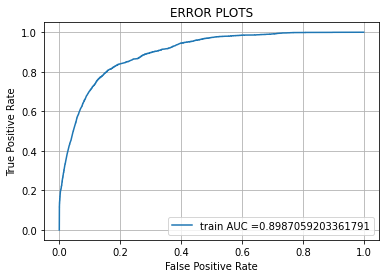

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

clf_rf= RandomForestClassifier(n_estimators= 150, max_depth= 13, min_samples_split= 5, min_samples_leaf= 2)
#sets max_depth= 10 and n_estimators= 1000 i.e best parameters
clf_rf.fit(train_df, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf_rf.predict_proba(train_df) [:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

## XGBRFClassifier

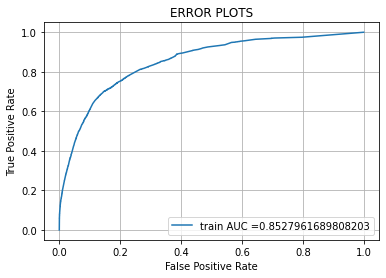

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from xgboost import XGBRFClassifier
from sklearn.metrics import roc_curve, auc

xgb= XGBRFClassifier
clf_xgbrf = xgb(max_depth=10, n_estimators=200, subsample=0.8, colsample_bytree=1)
clf_xgbrf.fit(train_df, y_train)

y_train_pred = clf_xgbrf.predict_proba(train_df) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

## XGBClassifier

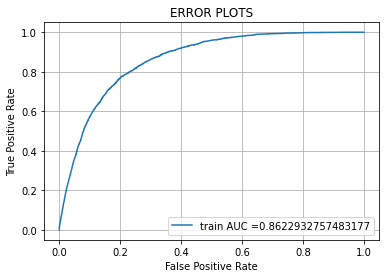

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

xgb= XGBClassifier
clf_xgb = xgb(max_depth=4, n_estimators=50, scale_pos_weight=22, subsample=0.7)
clf_xgb.fit(train_df, y_train)

y_train_pred = clf_xgb.predict_proba(train_df) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

## LGBM

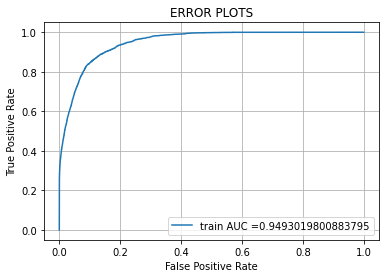

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from lightgbm import LGBMClassifier

lgbm= LGBMClassifier
clf_lgbm = lgbm(max_depth=-1, n_estimators=200, class_weight=None, subsample=0.6, learning_rate=0.1, num_leaves=41)
clf_lgbm.fit(train_df, y_train)

y_train_pred = clf_lgbm.predict_proba(train_df) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

## ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf_adb = AdaBoostClassifier(n_estimators=350, learning_rate=1, random_state=0)
clf_adb.fit(train_df, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=350, random_state=0)

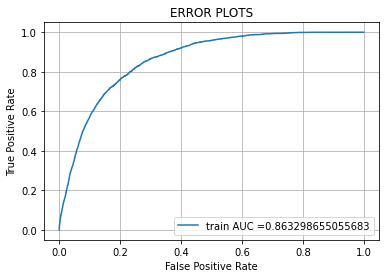

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

y_train_pred = clf_adb.predict_proba(train_df) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

## Deep Learning:

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv1D
from tensorflow.keras import Input
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# train_test_split
X_train, X_val, y_train, y_val= train_test_split(train_df, y_train, test_size=0.3, stratify= y_train)

In [ ]:
#Scaling
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_val= scaler.transform(X_val)
test_df_dl= scaler.transform(test_df)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(test_df_dl.shape)

(53214, 149)
(22806, 149)
(75818, 149)


In [ ]:
y_train=y_train.to_numpy()
y_val=y_val.to_numpy()

# reshaping as per neural network requires
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val= X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_dl = test_df_dl.reshape(test_df.shape[0], test_df.shape[1], 1)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test_dl.shape)

(53214, 149, 1)
(22806, 149, 1)
(75818, 149, 1)


In [ ]:
#final 
train_input= X_train[0].shape

model=Sequential()

model.add(Conv1D(64, 3, strides=1, padding='valid', activation='relu', input_shape= train_input))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 147, 64)           256       
_________________________________________________________________
batch_normalization_1 (Batch (None, 147, 64)           256       
_________________________________________________________________
flatten_1 (Flatten)          (None, 9408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2408704   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [ ]:
epochs= 50
chkpoint = ModelCheckpoint('/content/drive/MyDrive/Santander/chk/July_23.h5',
                             monitor='val_auc',
                             mode='max',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only = True)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

In [ ]:
model.save("/content/drive/MyDrive/Santander/pickle/models/dl_model")

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks= chkpoint, verbose=1)

Epoch 1/50
1663/1663 [==============================] - 45s 10ms/step - loss: 0.1956 - auc: 0.6830 - val_loss: 0.1498 - val_auc: 0.7939

Epoch 00001: val_auc improved from -inf to 0.79395, saving model to /content/drive/MyDrive/Santander/chk/July_23.h5
Epoch 2/50
1663/1663 [==============================] - 15s 9ms/step - loss: 0.1561 - auc: 0.7560 - val_loss: 0.1523 - val_auc: 0.8086

Epoch 00002: val_auc improved from 0.79395 to 0.80862, saving model to /content/drive/MyDrive/Santander/chk/July_23.h5
Epoch 3/50
1663/1663 [==============================] - 15s 9ms/step - loss: 0.1486 - auc: 0.7811 - val_loss: 0.1397 - val_auc: 0.8147

Epoch 00003: val_auc improved from 0.80862 to 0.81466, saving model to /content/drive/MyDrive/Santander/chk/July_23.h5
Epoch 4/50
1663/1663 [==============================] - 15s 9ms/step - loss: 0.1468 - auc: 0.7901 - val_loss: 0.1412 - val_auc: 0.8144

Epoch 00004: val_auc did not improve from 0.81466
Epoch 5/50
1663/1663 [=============================

## Ensemble

We will just take average of the outputs from all six models and use them as our final output.

In [ ]:
y_test_pred_rf = clf_rf.predict_proba(test_df)[:,1]
y_test_pred_xgbrf = clf_xgbrf.predict_proba(test_df)[:,1]
y_test_pred_xgb = clf_xgb.predict_proba(test_df)[:,1]
y_test_pred_lgbm = clf_lgbm.predict_proba(test_df)[:,1]
y_test_pred_adb = clf_adb.predict_proba(test_df) [:,1]

y_test_pred= model.predict(X_test_dl) #dl model
y_test_pred_dl= []
for i in range(y_test_pred.shape[0]):
  y_test_pred_dl.append(y_test_pred[i][0])

y_test_pred= (y_test_pred_rf+ y_test_pred_xgbrf+ y_test_pred_xgb+ y_test_pred_lgbm+ y_test_pred_adb+ y_test_pred_dl )/6

submission = pd.DataFrame({"ID":test_id, "TARGET": y_test_pred})
submission.to_csv("submission.csv", index=False)

Best score I got is from ENSEMBLE of all the models i.e 'RandomForest', 'XGClassifier', 'XGBRFClassifier', 'LightGBMClassifier', 'ADAboostClassifier' and a 'Deep Learning Model' a score of 0.83968.

Individually all the models turned out to give a Kaggle score of 0.82-0.83, but ensemble of all the six models turned out to be the best.

# Saving models to pickle

In [ ]:
# save pickle
import pickle

with open('models/clf_rf.pkl','wb') as w:
  pickle.dump(clf_rf, w)
with open('models/clf_xgbrf.pkl','wb') as w:
  pickle.dump(clf_xgbrf, w)
with open('models/clf_xgb.pkl','wb') as w:
  pickle.dump(clf_xgb, w)
with open('models/clf_lgbm.pkl','wb') as w:
  pickle.dump(clf_lgbm, w)
with open('models/clf_adb.pkl','wb') as w:
  pickle.dump(clf_adb, w)
with open('scaler.pkl','wb') as w:
  pickle.dump(scaler, w)

# Load Models and get output:

In [ ]:
#load models:
import pickle

with open('clf_rf.pkl', 'rb') as o: #random_forest
    clf_rf = pickle.load(o)
with open('clf_xgbrf.pkl', 'rb') as o: #xgbrfclassifier
    clf_xgbrf = pickle.load(o)
with open('clf_xgb.pkl', 'rb') as o:#xgboost
    clf_xgb = pickle.load(o)
with open('clf_lgbm.pkl', 'rb') as o:#lgbmclassifier
    clf_lgbm = pickle.load(o)
with open('clf_adb.pkl', 'rb') as o:#adbclassifier
    clf_adb = pickle.load(o)
model = tf.keras.models.load_model('dl_model')#neuaral network model

with open('scaler.pkl', 'rb') as o:
    scaler = pickle.load(o)

#preparing data for deep learning:
test_df_dl= scaler.transform(test_df)
X_test_dl = test_df_dl.reshape(test_df.shape[0], test_df.shape[1], 1)

# prediction:
y_test_pred_rf = clf_rf.predict_proba(test_df)[:,1]
y_test_pred_xgbrf = clf_xgbrf.predict_proba(test_df)[:,1]
y_test_pred_xgb = clf_xgb.predict_proba(test_df)[:,1]
y_test_pred_lgbm = clf_lgbm.predict_proba(test_df)[:,1]
y_test_pred_adb = clf_adb.predict_proba(test_df) [:,1]

y_test_pred= model.predict(X_test_dl) #dl model
y_test_pred_dl= []
for i in range(y_test_pred.shape[0]):
  y_test_pred_dl.append(y_test_pred[i][0])

y_test_pred= (y_test_pred_rf+ y_test_pred_xgbrf+ y_test_pred_xgb+ y_test_pred_lgbm+ y_test_pred_adb+ y_test_pred_dl )/6

submission = pd.DataFrame({"ID":test_id, "TARGET": y_test_pred})
submission.to_csv("submission.csv", index=False)